In [3]:
%matplotlib widget

In [4]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

# $\varphi$ Evaluation

<img src="phi eval.png" width="700"/> 

In [5]:
import numpy as np
end_t_val = np.arange(1,26,1)
phi_val = []
for i in range(len(end_t_val)):
    
    # dic_grd, dic_aligned_grid, dic_cor
    dic_grid = DICGrid(n_x=58, n_y=15, d_x = 22, d_y = 22, 
                     start_t = 0, end_t =end_t_val[i], U_factor = 1, dir_name='B6_TV1')
    dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-17, y_ref_j_min=1, y_ref_j_max=10)
    dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 29, n_x_max = 38, n_x_step=1, n_y_min = 4, n_y_step = 1)
    
    # evaluating deltas
    delta_u_ul_ija = dic_cor.dic_aligned_grid.delta_u_ul_ija
    delta_u0_ul_ija = dic_cor.dic_aligned_grid.delta_u0_ul_ija
    
    # selected points for rotation
    rot_Xu_ija = dic_cor.dic_aligned_grid.rot_Xu_ija
    rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                   dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
    rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2)

    # selection of grid of points
    X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                    dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
    X_pa_sel = X_ija_sel.reshape(-1, 2)

    # evaluating distances using distance formula
    d_tc = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - rot_X_pa_sel[:, 0]) ** 2
                                   + (dic_cor.x_cor_pa_sol[:, 1] - rot_X_pa_sel[:, 1]) ** 2)

    d_0c = np.sqrt((dic_cor.x_cor_pa_sol[:, 0] - X_pa_sel[:, 0]) ** 2
                                     + (dic_cor.x_cor_pa_sol[:, 1] - X_pa_sel[:, 1]) ** 2)

    d_0t = np.sqrt((rot_X_pa_sel[:, 0] - X_pa_sel[:, 0]) ** 2
                                     + (rot_X_pa_sel[:, 1] - X_pa_sel[:, 1]) ** 2)

    # averaging all distances
    d_tc_avg = np.average(d_tc)
    d_0c_avg = np.average(d_0c)
    d_0t_avg = np.average(d_0t)
    
    # calculating phi using law of cosine
    phi = np.arccos(
            (d_tc_avg ** 2 + d_0c_avg ** 2 - d_0t_avg ** 2)
            / (2 * d_tc_avg * d_0c_avg))
    phi_val.append(phi)
    #print(phi_val)

In [6]:
load = np.loadtxt(r"D:\Shear zones\load text files\Load_b6_tv1.txt", unpack=True)
#np.shape(load)
#load

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
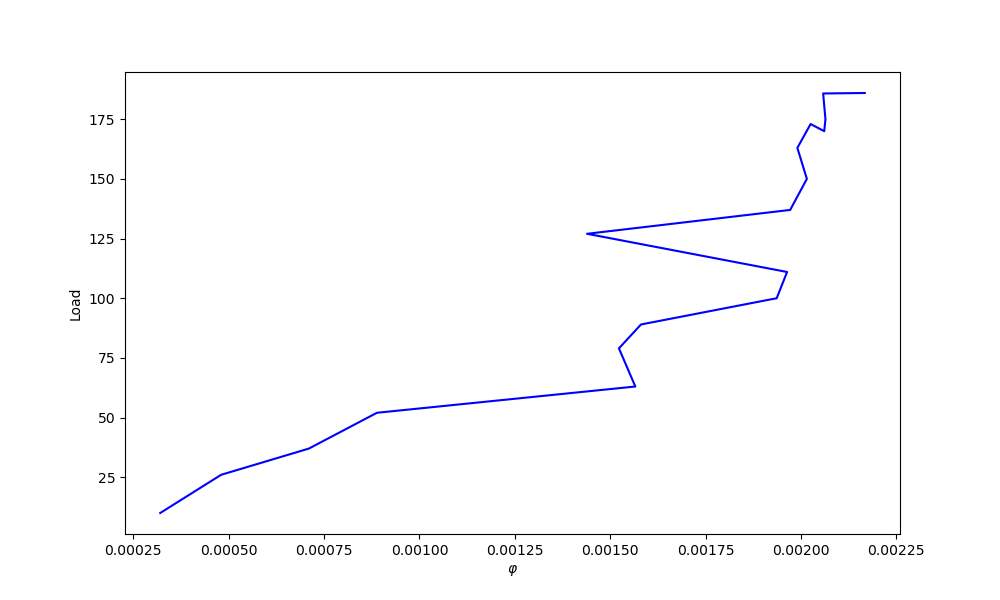

In [7]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.plot(phi_val[0:18], load[1:19], color = 'blue')
ax1.set_xlabel(r'$\varphi$'), ax1.set_ylabel('Load')
plt.savefig("D:\\Shear zones\drawings\Load_rotation.pdf")

In [8]:
# home_dir = expanduser('~')
# data_dir = join(home_dir,'simdb','data','load')
# data_dir

In [9]:
# results = [join(data_dir,each) 
#            for each in sorted(os.listdir(data_dir)) 
#            if each.endswith('.txt')]
# results

In [10]:
# import numpy as np

# _, rot_vect_u_anp, _ = dic_cor.dic_aligned_grid.displ_grids
# rot_vect_u_anp_sel = rot_vect_u_anp[:,:,dic_cor.dic_aligned_grid.y_ref_j_min:dic_cor.dic_aligned_grid.y_ref_j_max]
# rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
#                                    dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
# rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2) 
# dist_x_cor_u_end = np.sqrt((dic_cor.x_cor_pa_sol[:,0] - rot_X_pa_sel[:,0])**2
#                      +(dic_cor.x_cor_pa_sol[:,1] - rot_X_pa_sel[:,1])**2)
# np.shape(rot_vect_u_anp[:,:,dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
# rot_vect_u_anp[:,:,:]
# X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
#                                    dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
# X_pa_sel = X_ija_sel.reshape(-1, 2)
# dist_x_cor_u_start = np.sqrt((dic_cor.x_cor_pa_sol[:,0] - X_pa_sel[:,0])**2
#                       +(dic_cor.x_cor_pa_sol[:,1] - X_pa_sel[:,1])**2)
# dist_u_end_u_start = np.sqrt((rot_X_pa_sel[:,0] - X_pa_sel[:,0])**2
#                       +(rot_X_pa_sel[:,1] - X_pa_sel[:,1])**2)
# # phi = np.arccos((dist_x_cor_u_end**2 + dist_x_cor_u_start**2 - dist_u_end_u_start**2)
# #                 / (2 * dist_x_cor_u_end * dist_x_cor_u_start))
# dist_x_cor_u_end_average = np.average(dist_x_cor_u_end)
# dist_x_cor_u_start_average = np.average(dist_x_cor_u_start)
# dist_u_end_u_start_average = np.average(dist_u_end_u_start)
# dist_x_cor_u_end_average, dist_x_cor_u_start_average, dist_u_end_u_start_average
# phi = np.arccos((dist_x_cor_u_end_average**2 + dist_x_cor_u_start_average**2 - dist_u_end_u_start_average**2)
#                 / (2 * dist_x_cor_u_end_average * dist_x_cor_u_start_average))
# phi * 180/np.pi